Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [86]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [87]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [88]:
# YOUR CODE GOES HERE
print(transactions.shape)
print(items.shape)
print(item_categories.shape)
print(shops.shape)
print(transactions.head())
print(items.head())
print(item_categories.head())

(2935849, 6)
(22170, 3)
(84, 2)
(60, 2)
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4              

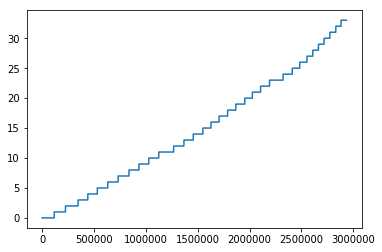

In [89]:
transactions.date_block_num.plot()

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [90]:
transactions['date'] = pd.to_datetime(transactions.date, format='%d.%m.%Y')
transactions['revenue'] = transactions.item_cnt_day * transactions.item_price

In [91]:
sep_14 = transactions[(transactions.date.dt.year == 2014) & (transactions.date.dt.month == 9)]
sep_14.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
1953691,2014-09-24,20,5,1039,899.0,1.0,899.0
1953692,2014-09-27,20,5,1015,449.0,1.0,449.0
1953693,2014-09-07,20,5,1329,399.0,1.0,399.0
1953694,2014-09-27,20,5,984,399.0,1.0,399.0
1953695,2014-09-08,20,5,984,399.0,1.0,399.0


In [92]:
max_revenue = sep_14.groupby('shop_id').revenue.sum().max() # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999956


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [94]:
summer_2014 = transactions[(transactions.date.dt.year == 2014) & (transactions.date.dt.month.isin([6, 7, 8]))]

In [95]:
summer_2014_with_cat = summer_2014.merge(items, how='left')
summer_2014_with_cat.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,item_name,item_category_id
0,2014-06-15,17,26,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
1,2014-06-10,17,26,9507,149.00,1.0,149.00,В ПОИСКАХ НЕМО (регион),40
2,2014-06-13,17,26,9509,246.32,1.0,246.32,В ПОСТЕЛИ С ВРАГОМ (BD),37
3,2014-06-03,17,26,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
4,2014-06-08,17,26,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30


In [96]:
sum_summer_2014_with_cat = summer_2014_with_cat.groupby('item_category_id').sum()
sum_summer_2014_with_cat.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
item_category_id,,,,,,
2,20651,37446,7302733,2727215.50,1180.0,2755520.0
3,48319,87158,18439062,6231604.85,2910.0,6854669.8
4,2372,4342,748239,38235.20,135.0,38833.2
5,10210,19187,3163795,414318.10,574.0,418233.1
6,33227,63873,14878062,3151830.50,1978.0,3360382.5


In [97]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = sum_summer_2014_with_cat.idxmax()['revenue'] # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [98]:
groupby_id = transactions.groupby('item_id').nunique()

In [99]:
groupby_id[groupby_id.item_price == 1].count()['item_price']

5926

In [100]:
# YOUR CODE GOES HERE

num_items_constant_price = groupby_id[groupby_id.item_price == 1].count()['item_price'] # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [109]:
shop_id = 25
shop_25_december_2014 = transactions[(transactions.shop_id == shop_id) &
                                     (transactions.date.dt.year == 2014) &
                                     (transactions.date.dt.month == 12)]


In [102]:
shop_25_december_2014.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
2295837,2014-12-14,23,25,21752,399.0,1.0,399.0
2295838,2014-12-13,23,25,21752,399.0,3.0,1197.0
2295839,2014-12-26,23,25,21733,149.0,1.0,149.0
2295840,2014-12-31,23,25,21732,149.0,1.0,149.0
2295841,2014-12-30,23,25,21726,149.0,1.0,149.0


In [103]:
shop_25_december_2014['day'] = shop_25_december_2014.date.dt.day
shop_25_december_2014.head()

/home/ykirpichev/miniconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,day
2295837,2014-12-14,23,25,21752,399.0,1.0,399.0,14
2295838,2014-12-13,23,25,21752,399.0,3.0,1197.0,13
2295839,2014-12-26,23,25,21733,149.0,1.0,149.0,26
2295840,2014-12-31,23,25,21732,149.0,1.0,149.0,31
2295841,2014-12-30,23,25,21726,149.0,1.0,149.0,30


In [104]:
sum_shop_25 = shop_25_december_2014.groupby('day', as_index=False).sum()
sum_shop_25.head()

,day,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,1,2829,3075,1242306,184735.166667,153.0,209894.0
1,2,2645,2875,1102409,133824.000000,169.0,213936.0
2,3,3473,3775,1633215,174046.783333,195.0,232803.0
3,4,2944,3200,1341594,202249.666667,164.0,279488.0
4,5,5221,5675,2451915,301296.066667,300.0,410842.0


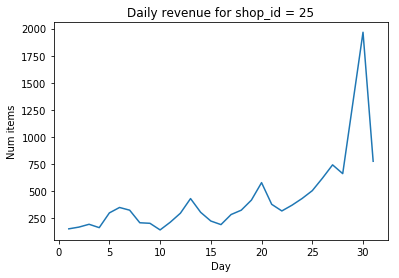

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [112]:
# total_num_items_sold = shop_25_december_2014.item_cnt_day.sum()# YOUR CODE GOES HERE

total_num_items_sold = sum_shop_25.item_cnt_day
days = sum_shop_25.day # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = total_num_items_sold.var(ddof=1) # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [117]:
STUDENT_EMAIL = # EMAIL HERE
STUDENT_TOKEN = # TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999956
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [118]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)